# BackMAP EXAMPLES

## Calculating Ramachandran numbers from phi, psi angles
Firstly, the Ramachandran number is easy to calculate if you already have each residue's $Φ$ (phi) and $Ψ$ (psi) values.

E.g.:

In [1]:
import backmap
phi=110
psi=100
R_local = (phi+psi+360)/720.0

# Showing that this is the same as backmap.R()
assert backmap.R(phi=phi,psi=psi) == R_local

## Using BackMAP to extract per-residue descriptors without displaying them

$Φ$ (phi) and $Ψ$ (psi) values are hard to calculate on the fly. If per residue phi, psi, and Ramachandran (R) numbers alal you need, then use `backmap.process_PDB()`.

Here is an example ([1MBA](https://www.rcsb.org/structure/1MBA)) of a simple PDB that has only one structure:

In [2]:
# A single PDB file with only one structure in it; note the model column that only contains the number 1
pdbfn = '../tests/pdbs/1mba.pdb'
structure_df1 = backmap.process_PDB(pdbfn)
print(f"{pdbfn} starts with:")
display(structure_df1.head(2))
print(f"...and ends with:")
structure_df1.tail(2)

../tests/pdbs/1mba.pdb starts with:


,atomno,resname,chain,resid,occupancy,tf,segname,model,phi,psi,R
0,4,SER,A,1,1.0,33.28,None,1,NaN,177.269699,NaN
1,10,LEU,A,2,1.0,20.17,None,1,-100.452393,162.714546,0.586475


...and ends with:


,atomno,resname,chain,resid,occupancy,tf,segname,model,phi,psi,R
144,1077,GLY,A,145,1.0,17.51,None,1,109.263031,1.896584,0.654388
145,1081,ALA,A,146,1.0,26.43,None,1,-142.910634,NaN,NaN


And here is an example ([2fft](https://www.rcsb.org/structure/2FFT)) of a single PDB containing 20 structures (separated by the `MODEL` keyword):

In [3]:
# A more complicated PDB, with multiple models 
import backmap 
pdbfn = '../tests/pdbs/2fft.pdb.gz'
structure_df2 = backmap.process_PDB(pdbfn)
print(f"{pdbfn} starts with:")
display(structure_df2.head(2))
print(f"...and ends with:")
structure_df2.tail(2)

../tests/pdbs/2fft.pdb.gz starts with:


,atomno,resname,chain,resid,occupancy,tf,segname,model,phi,psi,R
0,1,SER,A,1,1.0,2.00,None,1,NaN,29.085181,NaN
1,12,ALA,A,2,1.0,14.23,None,1,-161.710494,157.217687,0.49376


...and ends with:


,atomno,resname,chain,resid,occupancy,tf,segname,model,phi,psi,R
1678,1209,LYS,A,83,1.0,44.30,None,20,-73.415831,159.043977,0.618928
1679,1231,ASP,A,84,1.0,21.33,None,20,-66.013609,NaN,NaN


## Bonus: marking specific residues

In [4]:
# You can create a new boolean column called "mark" to mark any residues 
# that you might want to. These residues will have a black square next to 
# them adjacent to the right y axis 

# Marking all lycines (normally, you would want to mark something more specific)
structure_df1['mark'] = False
structure_df1.loc[structure_df1['resname']=='LYS','mark'] = True

structure_df2['mark'] = False
structure_df2.loc[structure_df2['resname']=='LYS','mark'] = True

# Check in the display section to see the relevant residues marked 
# (in the per-residue graphs) to the right of the main graph 
# and to the left of the color bar.

## Displaying structures and ensembles
Sometimes, displaying these structures can reveal interesting features quickly


### A slightly boring example: 1MBA
For example, for PDB ID 1mba, the second figure under heading 1 immediately reveals that the protein is dominantly  alpha helical.

 ---- 	---------
 1  	Ramachandran number (PDB: ../tests/pdbs/1mba.pdb)


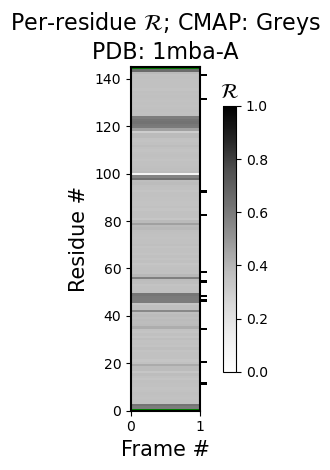

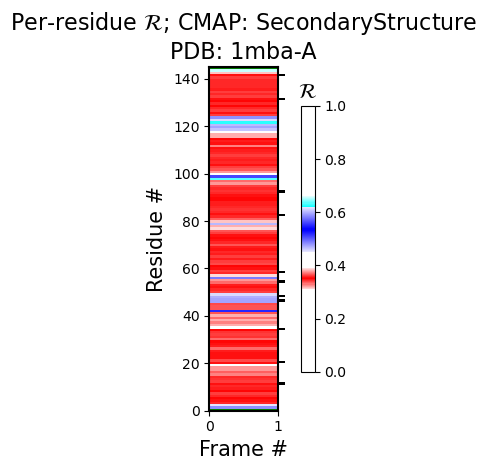

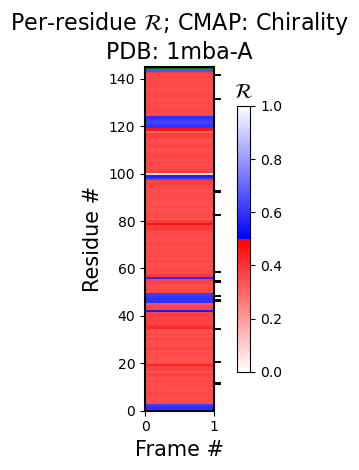

 2.  	Histogram (PDB: 1xqq)


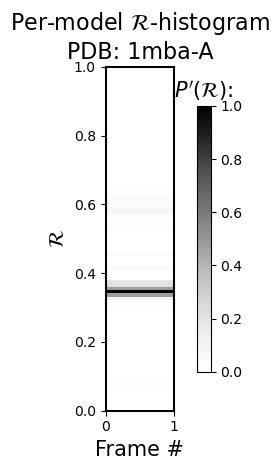

 3.  	RMSF (PDB: 1mba)
	Chain "A" has only one model. Not drawing this graph.
 4.  	RMSD (PDB: 1mba)
	Chain "A" has only one model. Not drawing this graph.
---- 	---------
Each of the figures shown correspond to an element in the returned 
'figure_dict' dictionary, with the keys as follows:
	chain_A_val_cmapGreys
	chain_A_val_cmapSecondaryStructure
	chain_A_val_cmapChirality
	chain_A_his_cmapChirality


<Figure size 640x480 with 0 Axes>

In [5]:
success, figure_dict = backmap.draw_figures(structure_df=structure_df1, output_dir=None, write=False, show=True)
print('---- 	---------')

printme = f"""Each of the figures shown correspond to an element in the returned 
'figure_dict' dictionary, with the keys as follows:"""
print(printme)

print('\t'+'\n\t'.join(figure_dict.keys()))

### A more interesting structure: 2FFT

Note that looking at just one structure does not matter much, however, if you look at ensembles, then the value of the Ramachandran number is more visible.

For example, the black-and-white histogram (Fig 1) shows that there is a single stable segment of the protein around residue number 20, which turns out to be an alpha helix.

Also, the same figure shows an interesting stable point at residue numbe 60. If there were two stable sections in a protein, you would only visualize the first or the second section by aligning all structures to that sections, but, given that their relative positions are always fluctuating due to the variable regions, you can not align both section together (also see 3 and 4).

 ---- 	---------
 1  	Ramachandran number (PDB: ../tests/pdbs/2fft.pdb.gz)


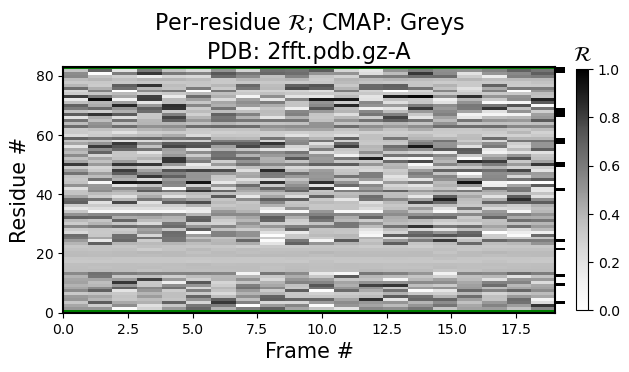

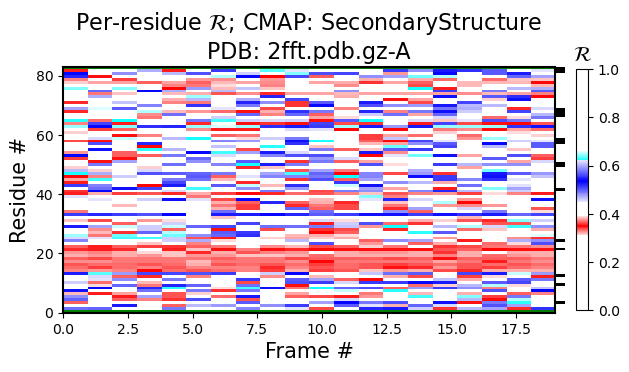

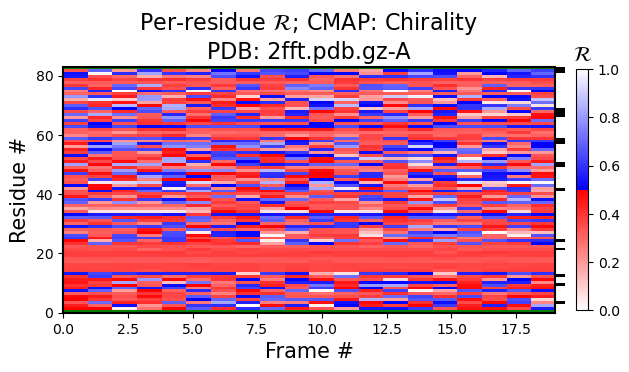

 2.  	Histogram (PDB: 1xqq)


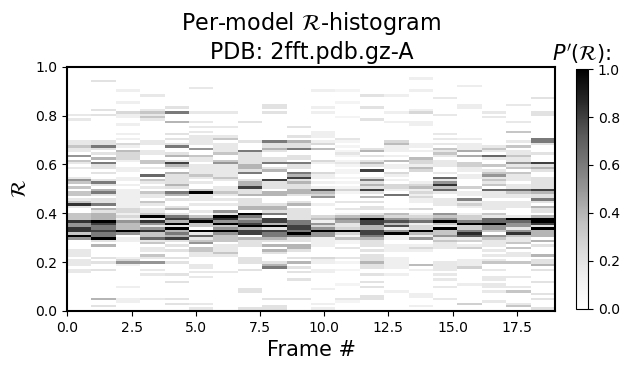

 3.  	RMSF (PDB: 2fft.pdb.gz)


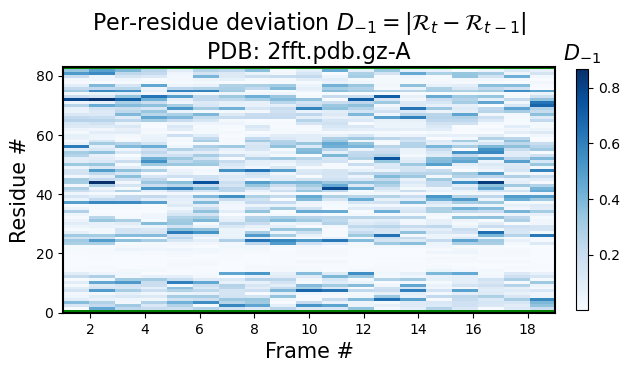

 4.  	RMSD (PDB: 2fft.pdb.gz)


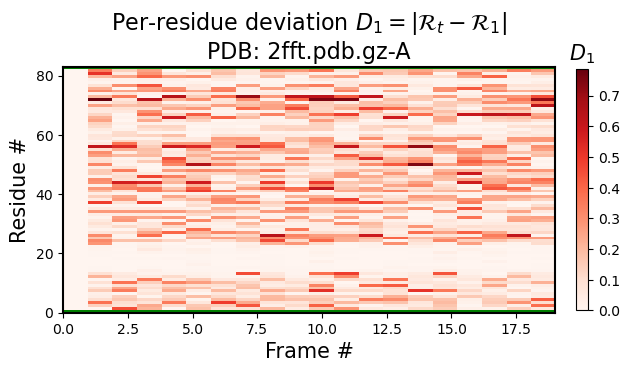

<Figure size 640x480 with 0 Axes>

In [6]:

success, figure_dict = backmap.draw_figures(structure_df=structure_df2, output_dir=None, write=False, show=True)
printme = f"""Each of the figures shown correspond to an element in the returned 
'figure_dict' dictionary, with the keys as follows: {figure_dict.keys()}"""
    

## Displaying Custom Colormaps
Here are the custom color maps that are useful for displaying your own R-derived images. Their names should be identical to the names used for colormaps above

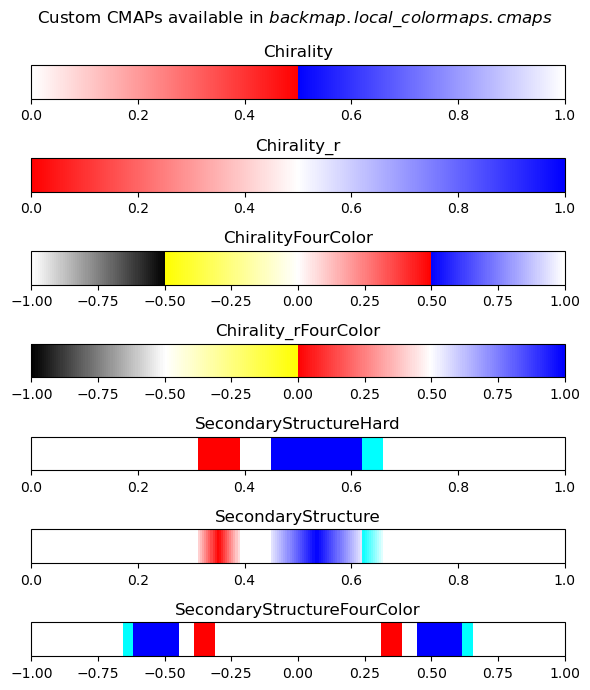

In [7]:
# Showing the types of colormaps available to backmap.local_colormaps

import backmap

fig,axes = backmap.local_colormaps.display_cmaps()

Credit: the following walkthrough helped to integrate this notebook into the documentation
https://cybergis.github.io/github-pages-demo/tutorial/nbsphinx.html